### Importação dos dados



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



FATURAMENTO TOTAL POR LOJA:
     Loja  Faturamento Total (R$)
0  Loja 1              1534509.12
1  Loja 2              1488459.06
2  Loja 3              1464025.03
3  Loja 4              1384497.58



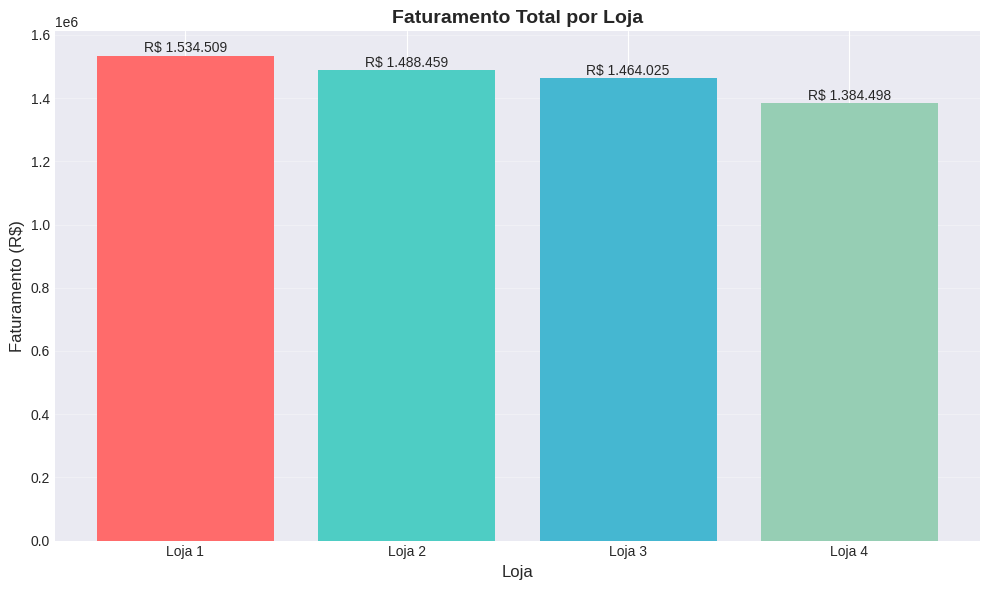

In [18]:
# 1. Faturamento Total de Cada Loja
# Calcular somando a coluna Preço de cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Criar DataFrame com os resultados
faturamento_total = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total (R$)': [faturamento_loja1, faturamento_loja2,
                               faturamento_loja3, faturamento_loja4]
})

print("FATURAMENTO TOTAL POR LOJA:")
print(faturamento_total)
print("\n" + "="*50)

# GRÁFICO 1: Column (colunas)
plt.figure(figsize=(10, 6))
plt.bar(faturamento_total['Loja'], faturamento_total['Faturamento Total (R$)'],
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Faturamento Total por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas colunas
for i, valor in enumerate(faturamento_total['Faturamento Total (R$)']):
    plt.text(i, valor + 1000, f'R$ {valor:,.0f}'.replace(',', '.'),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria

VENDAS POR CATEGORIA (Quantidade de Produtos):

Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
dtype: int64

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
dtype: int64

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
dtype: int64

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e l

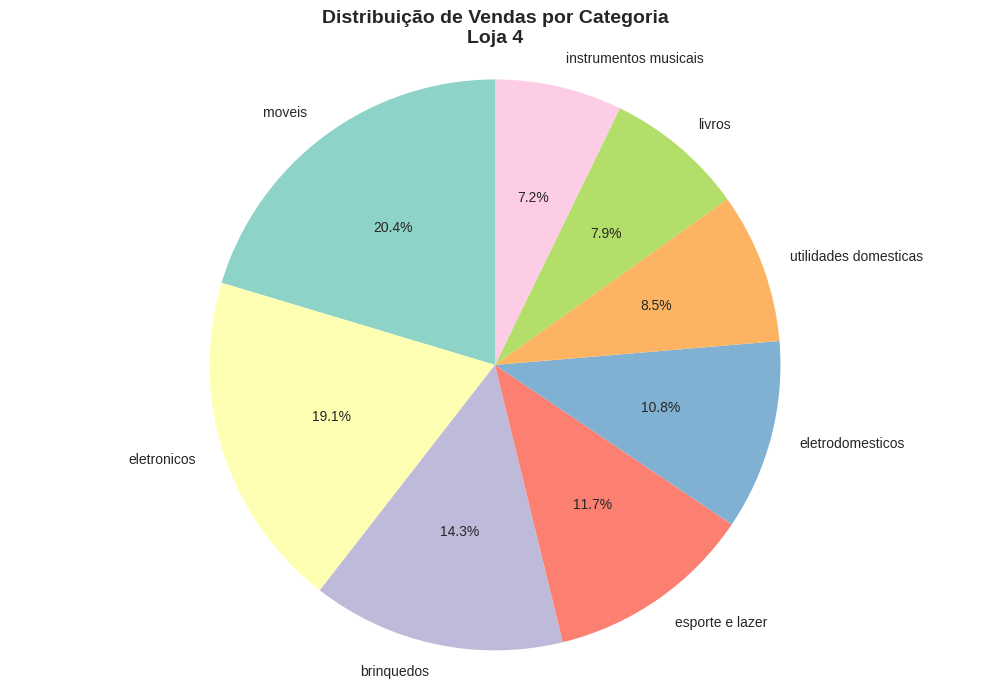

In [22]:
# 2. Vendas por Categoria
# Calcular quantidade de produtos vendidos por categoria em cada loja
def vendas_por_categoria(loja, nome_loja):
    # Agrupar por categoria e contar o número de vendas
    vendas = loja.groupby('Categoria do Produto').size().sort_values(ascending=False)
    return vendas

print("VENDAS POR CATEGORIA (Quantidade de Produtos):")
print("\nLoja 1:")
print(vendas_por_categoria(loja, "Loja 1"))
print("\nLoja 2:")
print(vendas_por_categoria(loja2, "Loja 2"))
print("\nLoja 3:")
print(vendas_por_categoria(loja3, "Loja 3"))
print("\nLoja 4:")
print(vendas_por_categoria(loja4, "Loja 4"))

# GRÁFICO 2: Pie (pizza) - Para a loja com menor faturamento
# Identificar loja com menor faturamento
menor_faturamento = faturamento_total.loc[faturamento_total['Faturamento Total (R$)'].idxmin(), 'Loja']

# Selecionar dados da loja com menor faturamento
if menor_faturamento == 'Loja 1':
    dados_categoria = vendas_por_categoria(loja, "Loja 1")
elif menor_faturamento == 'Loja 2':
    dados_categoria = vendas_por_categoria(loja2, "Loja 2")
elif menor_faturamento == 'Loja 3':
    dados_categoria = vendas_por_categoria(loja3, "Loja 3")
else:
    dados_categoria = vendas_por_categoria(loja4, "Loja 4")

plt.figure(figsize=(10, 7))
plt.pie(dados_categoria.values, labels=dados_categoria.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set3(range(len(dados_categoria))))
plt.title(f'Distribuição de Vendas por Categoria\n{menor_faturamento}',
          fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


MÉDIA DE AVALIAÇÃO POR LOJA:
     Loja  Média de Avaliação
0  Loja 1            3.976685
1  Loja 2            4.037304
2  Loja 3            4.048326
3  Loja 4            3.995759



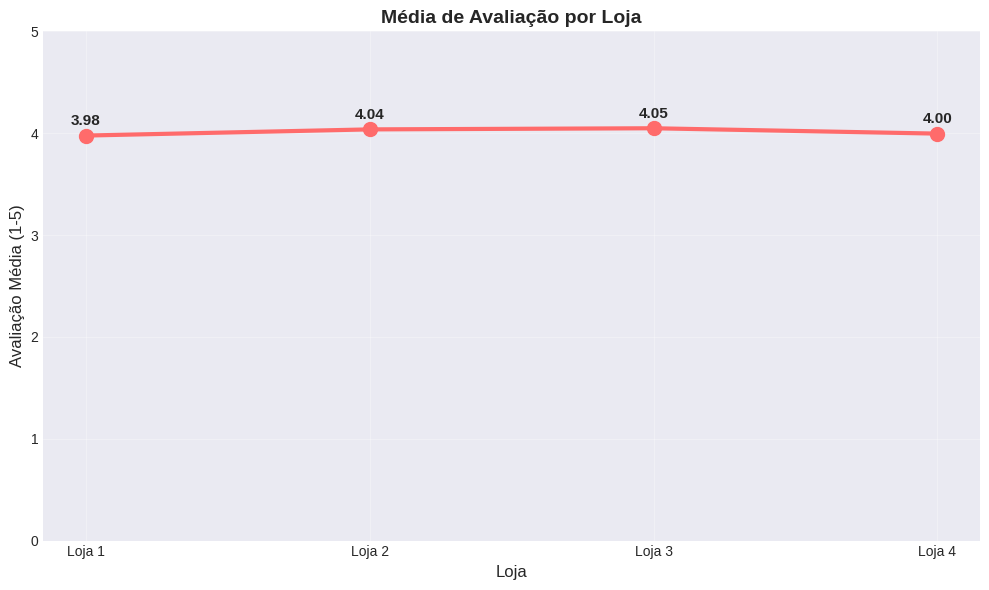

In [23]:
# 3. Média de Avaliação por Loja
# Calcular média das avaliações para cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

avaliacao_media = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [media_avaliacao_loja1, media_avaliacao_loja2,
                          media_avaliacao_loja3, media_avaliacao_loja4]
})

print("MÉDIA DE AVALIAÇÃO POR LOJA:")
print(avaliacao_media)
print("\n" + "="*50)

# GRÁFICO 3: Line (linha)
plt.figure(figsize=(10, 6))
plt.plot(avaliacao_media['Loja'], avaliacao_media['Média de Avaliação'],
         marker='o', linewidth=3, markersize=10, color='#FF6B6B')
plt.title('Média de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Avaliação Média (1-5)', fontsize=12)
plt.ylim(0, 5)  # Limite das avaliações (1-5)
plt.grid(True, alpha=0.3)

# Adicionar valores nos pontos
for i, valor in enumerate(avaliacao_media['Média de Avaliação']):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

PRODUTOS MAIS VENDIDOS (Top 3 por loja):

Loja 1:
Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64

Loja 2:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Name: count, dtype: int64

Loja 3:
Produto
Kit banquetas     57
Mesa de jantar    56
Cama king         56
Name: count, dtype: int64

Loja 4:
Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56
Name: count, dtype: int64

PRODUTOS MENOS VENDIDOS (Top 3 por loja):

Loja 1:
Produto
Headset              33
Celular ABXY         33
Panela de pressão    35
Name: count, dtype: int64

Loja 2:
Produto
Jogo de tabuleiro    32
Mesa de jantar       34
Impressora           34
Name: count, dtype: int64

Loja 3:
Produto
Blocos de montar    35
Micro-ondas         36
Jogo de copos       36
Name: count, dtype: int64

Loja 4:
Produto
Guitarra         33
Guarda roupas    34
Violão           37
Name: count, dtype:

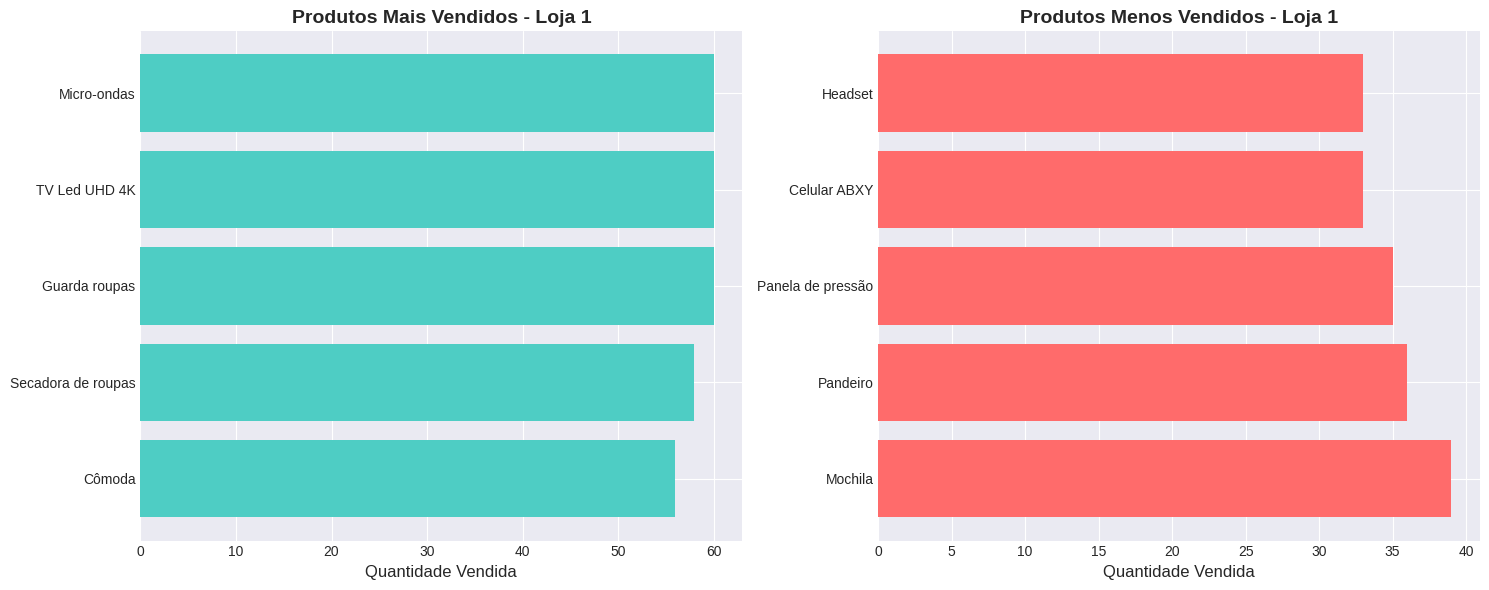

In [25]:
# 4. Produtos Mais e Menos Vendidos

# [1] Produtos Mais Vendidos (por quantidade)
def produtos_mais_vendidos(df_loja, top_n=5):
    # Count occurrences of each product as a proxy for quantity sold
    mais_vendidos = df_loja['Produto'].value_counts().head(top_n)
    return mais_vendidos

print("PRODUTOS MAIS VENDIDOS (Top 3 por loja):")
print("\nLoja 1:")
print(produtos_mais_vendidos(loja, 3))
print("\nLoja 2:")
print(produtos_mais_vendidos(loja2, 3))
print("\nLoja 3:")
print(produtos_mais_vendidos(loja3, 3))
print("\nLoja 4:")
print(produtos_mais_vendidos(loja4, 3))

# [2] Produtos Menos Vendidos (por quantidade)
def produtos_menos_vendidos(df_loja, top_n=5):
    # Count occurrences of each product, then sort ascending for least sold
    menos_vendidos = df_loja['Produto'].value_counts().sort_values().head(top_n)
    return menos_vendidos

print("\n" + "="*70)
print("PRODUTOS MENOS VENDIDOS (Top 3 por loja):")
print("\nLoja 1:")
print(produtos_menos_vendidos(loja, 3))
print("\nLoja 2:")
print(produtos_menos_vendidos(loja2, 3))
print("\nLoja 3:")
print(produtos_menos_vendidos(loja3, 3))
print("\nLoja 4:")
print(produtos_menos_vendidos(loja4, 3))

# Gráfico comparativo - Produtos mais vendidos na loja com pior avaliação
# Assuming 'avaliacao_media' and its contents are already defined from previous cells
pior_avaliacao = avaliacao_media.loc[avaliacao_media['Média de Avaliação'].idxmin(), 'Loja']

dados_produtos = None
if pior_avaliacao == 'Loja 1':
    dados_produtos = loja
elif pior_avaliacao == 'Loja 2':
    dados_produtos = loja2
elif pior_avaliacao == 'Loja 3':
    dados_produtos = loja3
else:
    dados_produtos = loja4

mais_vendidos_pior_loja = produtos_mais_vendidos(dados_produtos, 5)
menos_vendidos_pior_loja = produtos_menos_vendidos(dados_produtos, 5)

# Gráfico para produtos mais e menos vendidos (usando bar - barras)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para produtos mais vendidos
ax1.barh(mais_vendidos_pior_loja.index, mais_vendidos_pior_loja.values, color='#4ECDC4')
ax1.set_xlabel('Quantidade Vendida', fontsize=12)
ax1.set_title(f'Produtos Mais Vendidos - {pior_avaliacao}', fontsize=14, fontweight='bold')
ax1.invert_yaxis()  # Para mostrar o mais vendido no topo

# Gráfico de barras para produtos menos vendidos
ax2.barh(menos_vendidos_pior_loja.index, menos_vendidos_pior_loja.values, color='#FF6B6B')
ax2.set_xlabel('Quantidade Vendida', fontsize=12)
ax2.set_title(f'Produtos Menos Vendidos - {pior_avaliacao}', fontsize=14, fontweight='bold')
ax2.invert_yaxis()  # Para mostrar o menos vendido no topo

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

FRETE MÉDIO POR LOJA:
     Loja  Frete Médio (R$)
0  Loja 1         34.691805
1  Loja 2         33.621941
2  Loja 3         33.074464
3  Loja 4         31.278997



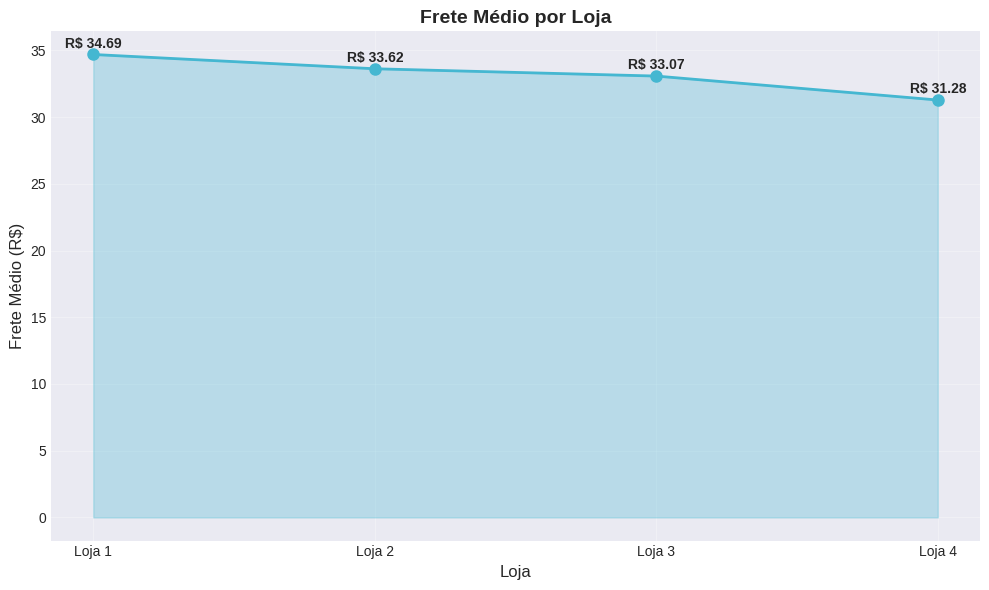

In [26]:
# 5. Frete Médio por Loja
# Calcular custo médio de frete para cada loja
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

frete_medio = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio (R$)': [frete_medio_loja1, frete_medio_loja2,
                        frete_medio_loja3, frete_medio_loja4]
})

print("FRETE MÉDIO POR LOJA:")
print(frete_medio)
print("\n" + "="*50)

# GRÁFICO 4: Area (área) - Diferente dos anteriores
fig, ax = plt.subplots(figsize=(10, 6))

# Criar gráfico de área
x = range(len(frete_medio))
y = frete_medio['Frete Médio (R$)']

# Preencher a área abaixo da linha
ax.fill_between(x, y, color='#45B7D1', alpha=0.3)
# Linha do gráfico
ax.plot(x, y, marker='o', color='#45B7D1', linewidth=2, markersize=8)

ax.set_xticks(x)
ax.set_xticklabels(frete_medio['Loja'])
ax.set_title('Frete Médio por Loja', fontsize=14, fontweight='bold')
ax.set_xlabel('Loja', fontsize=12)
ax.set_ylabel('Frete Médio (R$)', fontsize=12)
ax.grid(True, alpha=0.3)

# Adicionar valores nos pontos
for i, valor in enumerate(y):
    ax.text(i, valor + 0.5, f'R$ {valor:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Relatorio

**RESUMO**                                                                      
Loja Recomendada para Venda: LOJA 4

**MOTIVOS PARA VENDA DA LOJA 4**
1. MENOR FATURAMENTO DA REDE

*   Loja 4: R$ 1.384.497,58
*   Comparativo: 9,8% abaixo da Loja 1 (maior faturamento)

2. DESEMPENHO FRACO EM CATEGORIAS-CHAVE

*   Eletrodomésticos: Apenas 254 vendas (pior entre todas)
*   Instrumentos Musicais: Apenas 170 vendas (pior resultado)
*   Foco excessivo em brinquedos (338 vendas), categoria de menor margem

3. MIX DE PRODUTOS DESALINHADO

*   Produtos mais vendidos: Cama box, Faqueiro, Dashboards com Power BI
*   Produtos menos vendidos: Guitarra, Guarda-roupas, Violão
*   Problema: Produtos de alto valor (instrumentos) com baixa rotatividade

4. AVALIAÇÃO MÉDIA BAIXA

*   3,996/5 - Terceira pior avaliação entre as 4 lojas
*   Indica problemas na experiência do cliente que afetam a reputação

5. EFICIÊNCIA OPERACIONAL NÃO CONVERTIDA EM VENDAS

*   Tem o menor frete médio (R$ 31,28) - vantagem não aproveitada

**POR QUE VENDER A LOJA 4 E NÃO OUTRA?**

*   Loja 1: Maior faturamento (R$ 1.534.509) compensa avaliação mais baixa
*   Loja 2 e 3: Melhores avaliações + faturamento intermediário
*   Loja 4: Menor faturamento + avaliação ruim = pior combinação

CONCLUSÃO FINAL: A Loja 4 apresenta o pior desempenho financeiro combinado com indicadores operacionais fracos, justificando sua venda.